In [225]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from dotenv import load_dotenv
from scipy.stats import linregress

# load the .env environment variables into the notebook
load_dotenv()

#Get the API key from the environment variable as Python variable
weather_api_key = os.getenv("weather_api_key")

temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
# set lists for the dataframe
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# set initial count quantities for organization
record_count = 0
set_count = 1

print('''
-----------------------------
Beginning Data Retrieval     
-----------------------------''')

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if record_count > 48:
            record_count = 1
            set_count += 1
            city_name.append(city)
        else:
            record_count += 1
            city_name.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except Exception:
        print("City not found. Skipping...")

print('''
-----------------------------
Data Retrieval Complete      
-----------------------------''')


-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiznit
Processing Record 2 of Set 1 | sokolo
Processing Record 3 of Set 1 | maldonado
Processing Record 4 of Set 1 | kalabo
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | san policarpo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | pandan niog
Processing Record 13 of Set 1 | raga
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | chapais
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | rio grande
Processing Record 21 of

Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | bereda
City not found. Skipping...
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | puerto colombia
City not found. Skipping...
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | wilmington
Processing Record 46 of Set 4 | grindavik
Processing Record 47 of Set 4 | hay river
Processing Record 48 of Set 4 | kalmunai
Processing Record 49 of Set 4 | yakeshi
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | beloha
City not found. Skipping...
Processing Record 3 of Set 5 | yeppoon
Processing Record 4 of Set 5 | kangaatsiaq
Processing Record 5 of Set 5 | tomohon
City not found. Skipping...
Processing Record 6 of Set 5 | antalaha
Processing Record 7 of Set 5 | monte patria
Processing Record 8 of Set 5 | chabua
Processing Record 9 of Set 5

Processing Record 23 of Set 8 | romny
Processing Record 24 of Set 8 | uyskoye
Processing Record 25 of Set 8 | ramgarh
Processing Record 26 of Set 8 | hokitika
Processing Record 27 of Set 8 | eirunepe
City not found. Skipping...
Processing Record 28 of Set 8 | arkhara
Processing Record 29 of Set 8 | nanticoke
Processing Record 30 of Set 8 | gat
Processing Record 31 of Set 8 | flinders
Processing Record 32 of Set 8 | young
Processing Record 33 of Set 8 | smithers
Processing Record 34 of Set 8 | takahagi
Processing Record 35 of Set 8 | danshui
Processing Record 36 of Set 8 | vyritsa
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 8 | tucurui
Processing Record 38 of Set 8 | phichit
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | vostok
Processing Record 41 of Set 8 | illapel
Processing Record 42 of Set 8 | athabasca
Processing Record 43 of Set 8 | beyneu
City not found. Skipping...
Processing Record 44 of Set 8 | termiz
Processing Re

Processing Record 13 of Set 12 | labuhan
Processing Record 14 of Set 12 | mareeba
City not found. Skipping...
Processing Record 15 of Set 12 | sale
Processing Record 16 of Set 12 | kenai
Processing Record 17 of Set 12 | tomatlan
City not found. Skipping...

-----------------------------
Data Retrieval Complete      
-----------------------------


## Import API key
### from api_keys import weather_api_key

In [49]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_name,
    "Latitude":lat,
    "Longitude":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,
}

# establish dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiznit,29.5833,-9.5000,79.95,19,1,0.51,MA,1634462485
1,sokolo,14.7328,-6.1219,90.27,28,93,2.98,ML,1634462486
2,maldonado,-34.6667,-54.9167,47.23,76,0,4.72,UY,1634462486
3,kalabo,-14.9700,22.6814,94.37,25,5,7.40,ZM,1634462487
4,ushuaia,-54.8000,-68.3000,33.46,86,75,12.66,AR,1634462250
...,...,...,...,...,...,...,...,...,...
551,labuhan,-6.8844,112.2051,87.37,64,75,13.91,ID,1634462734
552,mareeba,-17.0000,145.4333,76.48,83,62,6.53,AU,1634462734
553,sale,34.0389,-6.8166,71.62,94,100,0.00,MA,1634462533
554,kenai,60.5544,-151.2583,34.14,92,90,8.05,US,1634462735


In [50]:
# Export the City_Data into a csv
weather_df.to_csv("raw_cities.csv",encoding="utf-8",index=False)

In [51]:
# clean the df to remove null cities
weather_df = weather_df.dropna()

In [52]:
# Inspect the data and remove the cities where the humidity > 100%.
weather_df['Humidity'].max()

100

In [53]:
# And to double check.
# Inspect the data and remove the cities where the humidity > 100%.
weather_df[["Humidity"]].describe()

,Humidity
count,556.000000
mean,67.973022
std,22.520725
min,7.000000
25%,55.000000
50%,73.000000
75%,85.000000
max,100.000000


In [54]:
# Make a copy as instructed
weather_df.to_csv("clean_city_data.csv", encoding="utf-8")

In [55]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

## Latitude vs Temperature Plot

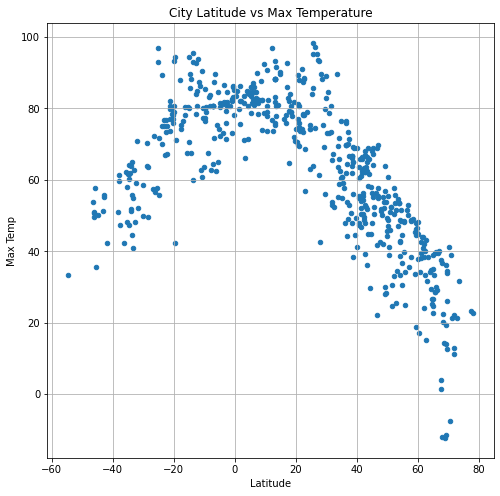

In [81]:
# Create a scatter plot which compares latitude to temperature
weather_df.plot(kind="scatter", x="Latitude", y="Max Temp", grid=True, figsize=(8,8),
              title="City Latitude vs Max Temperature")
plt.savefig("lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

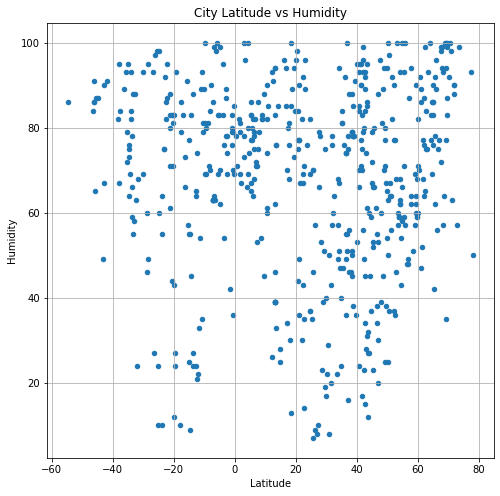

In [82]:
# Create a scatter plot which compares latitude to humidity
weather_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="City Latitude vs Humidity")
plt.savefig("lat_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

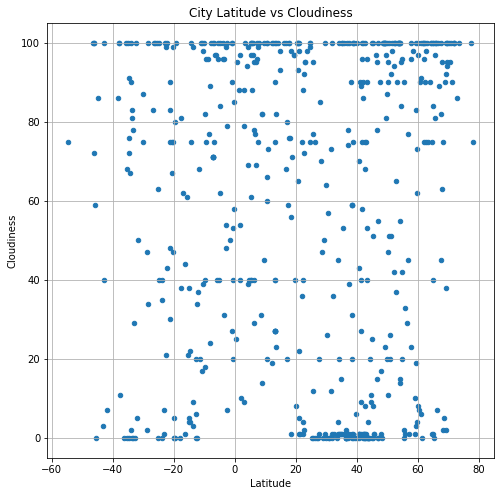

In [83]:
weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title="City Latitude vs Cloudiness")
plt.savefig("lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

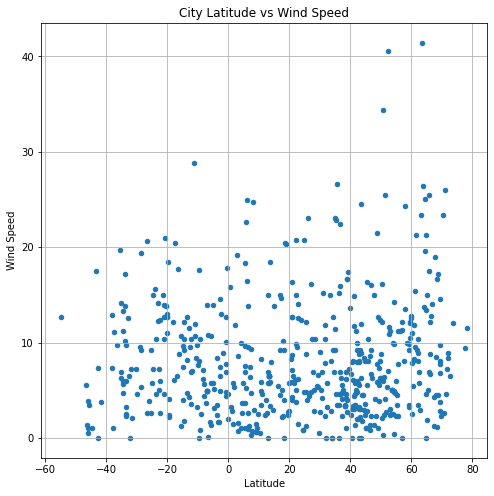

In [227]:
weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(8,8),
              title="City Latitude vs Wind Speed")
plt.savefig("lat_speed.png")
plt.show()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [166]:
north_weather_df = weather_df[weather_df['Latitude'] > 0]
north_weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiznit,29.5833,-9.5000,79.95,19,1,0.51,MA,1634462485
1,sokolo,14.7328,-6.1219,90.27,28,93,2.98,ML,1634462486
7,san policarpo,13.3034,-4.8956,88.30,39,27,6.49,ML,1634462302
9,lompoc,34.6391,-120.4579,62.53,47,1,6.91,US,1634462490
11,pandan niog,14.0453,124.1694,80.98,85,100,7.99,PH,1634462490
...,...,...,...,...,...,...,...,...,...
547,nizhniy odes,45.3926,39.2364,68.99,52,100,5.57,RU,1634462732
550,lata,40.1629,-8.3327,68.92,95,100,2.44,PT,1634462734
553,sale,34.0389,-6.8166,71.62,94,100,0.00,MA,1634462533
554,kenai,60.5544,-151.2583,34.14,92,90,8.05,US,1634462735


In [167]:
south_weather_df = weather_df[weather_df['Latitude'] < 0]
south_weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,maldonado,-34.6667,-54.9167,47.23,76,0,4.72,UY,1634462486
3,kalabo,-14.9700,22.6814,94.37,25,5,7.40,ZM,1634462487
4,ushuaia,-54.8000,-68.3000,33.46,86,75,12.66,AR,1634462250
5,touros,-5.1989,-35.4608,74.30,83,40,13.89,BR,1634462487
6,rikitea,-23.1203,-134.9692,75.06,75,7,14.20,PF,1634462386
...,...,...,...,...,...,...,...,...,...
546,ulladulla,-35.3500,150.4667,58.10,72,68,6.91,AU,1634462726
548,kirakira,-10.4544,161.9205,80.10,81,39,3.20,SB,1634462733
549,mitsamiouli,-11.3847,43.2844,86.29,54,20,28.77,KM,1634462733
551,labuhan,-6.8844,112.2051,87.37,64,75,13.91,ID,1634462734


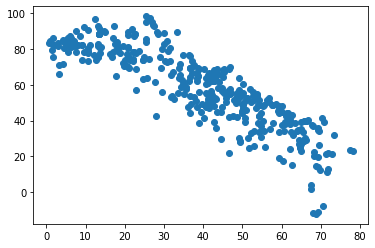

In [185]:
x_values = north_weather_df["Latitude"]
y_values = north_weather_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel:('Latitude')
plt.ylabel:('Temperature')
plt.show()

In [186]:
# Perform a linear regression on temperature vs. north latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      67.127233
1      81.277614
7      82.639626
9      62.309785
11     81.932702
         ...    
547    52.063253
550    57.046402
553    62.881689
554    37.616248
555    76.322289
Name: Latitude, Length: 398, dtype: float64


In [187]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.95x +95.32


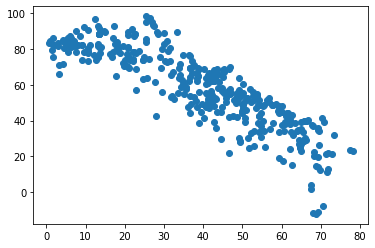

In [188]:
x_values = north_weather_df["Latitude"]
y_values = north_weather_df["Max Temp"]
plt.scatter(x_values,y_values)

#### Linear Regression
#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7524231223483774


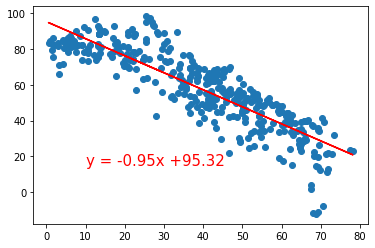

In [189]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel:'Latitude'
plt.ylabel:'Temperature'
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_lat_temp.png")
plt.show()

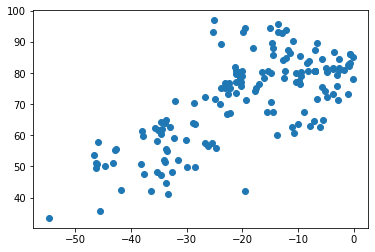

In [179]:
# South hemisphere
x_values = south_weather_df["Latitude"]
y_values = south_weather_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel:('Latitude')
plt.ylabel:('Temperature')
plt.show()

In [180]:
# Perform a linear regression on temperature vs. southern latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      59.650026
3      74.918679
4      44.042926
5      82.493122
6      68.600661
         ...    
546    59.120340
548    78.419119
549    77.697962
551    81.186542
552    73.345046
Name: Latitude, Length: 158, dtype: float64


In [181]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.78x +86.52


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5183780795138124


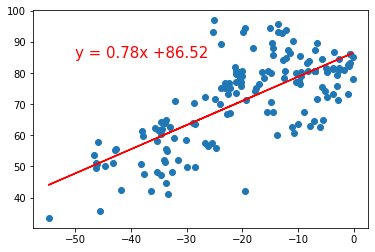

In [184]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel:'Latitude'
plt.ylabel:'Temperature'
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_lat_temp.png")
plt.show()

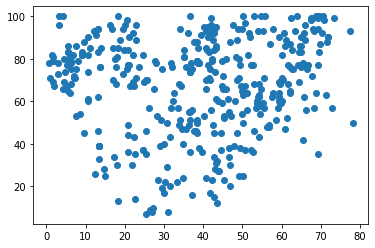

In [192]:
x_values = north_weather_df["Latitude"]
y_values = north_weather_df["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel:('Latitude')
plt.ylabel:('Humidity')
plt.show()

In [193]:
# Perform a linear regression on humidity vs. north latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      66.159705
1      64.549602
7      64.394625
9      66.707859
11     64.475063
         ...    
547    67.873762
550    67.306754
553    66.642785
554    69.517616
555    65.113444
Name: Latitude, Length: 398, dtype: float64


In [194]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.11x +62.95


#### Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008961479756136632


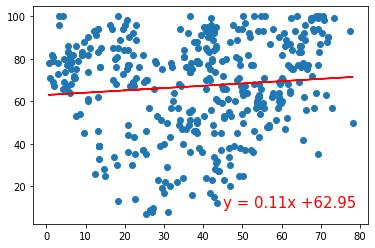

In [198]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel:'Latitude'
plt.ylabel:'Humidity'
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_lat_hum.png")
plt.show()

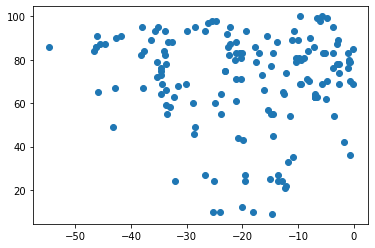

In [199]:
# South hemisphere
x_values = south_weather_df["Latitude"]
y_values = south_weather_df["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel:('Latitude')
plt.ylabel:('Humidity')
plt.show()

In [200]:
# Perform a linear regression on humidity vs. southern latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      72.194084
3      69.488858
4      74.959275
5      68.146854
6      70.608254
         ...    
546    72.287931
548    68.868667
549    68.996438
551    68.378348
552    69.767666
Name: Latitude, Length: 158, dtype: float64


In [201]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.14x +67.43


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006614053931655569


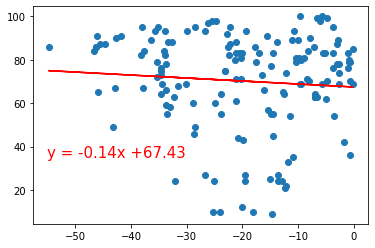

In [203]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel:'Latitude'
plt.ylabel:'Humidity'
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_lat_hum.png")
plt.show()

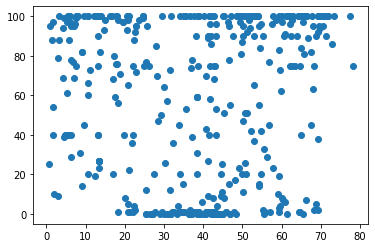

In [204]:
x_values = north_weather_df["Latitude"]
y_values = north_weather_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel:('Latitude')
plt.ylabel:('Cloudiness')
plt.show()

In [205]:
# Perform a linear regression on cloudiness % vs. north latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      56.291509
1      55.184337
7      55.077769
9      56.668442
11     55.133081
         ...    
547    57.470164
550    57.080266
553    56.623694
554    58.600545
555    55.572058
Name: Latitude, Length: 398, dtype: float64


In [206]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.07x +54.09


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001336569769668323


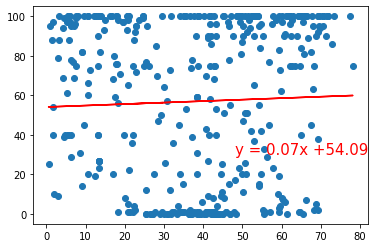

In [210]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel:('Latitude')
plt.ylabel:('Cloudiness')
plt.annotate(line_eq,(48,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_lat_cloud.png")
plt.show()

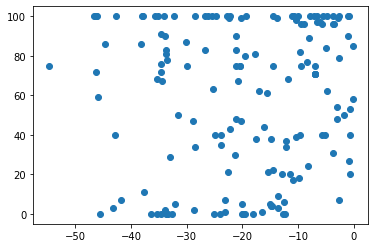

In [211]:
x_values = south_weather_df["Latitude"]
y_values = south_weather_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel:('Latitude')
plt.ylabel:('Cloudiness')
plt.show()

In [212]:
# Perform a linear regression on cloudiness % vs. south latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      55.115153
3      58.878316
4      51.268575
5      60.745139
6      57.321156
         ...    
546    54.984605
548    59.741047
549    59.563308
551    60.423115
552    58.490474
Name: Latitude, Length: 158, dtype: float64


In [213]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.19x +61.74


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004640646942633455


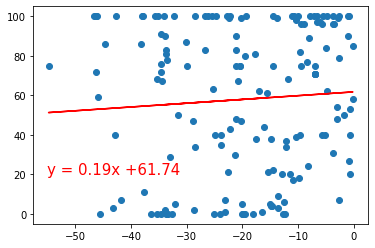

In [216]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel:('Latitude')
plt.ylabel:('Cloudiness')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_lat_cloud.png")
plt.show()

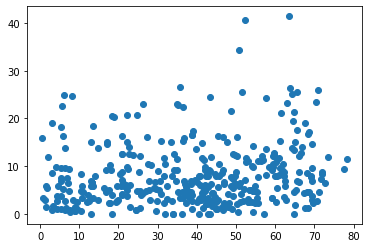

In [221]:
x_values = north_weather_df["Latitude"]
y_values = north_weather_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel:('Latitude')
plt.ylabel:('Wind Speed')
plt.show()

In [222]:
# Perform a linear regression on wind speed % vs. north latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      7.538446
1      6.797809
7      6.726520
9      7.790593
11     6.763521
         ...   
547    8.326900
550    8.066080
553    7.760659
554    9.083063
555    7.057172
Name: Latitude, Length: 398, dtype: float64


In [223]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.05x +6.06


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02304613808426567


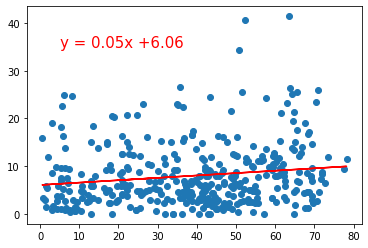

In [224]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel:('Latitude')
plt.ylabel:('Wind Speed')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("snorth_lat_speed.png")
plt.show()

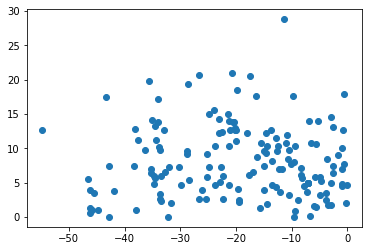

In [217]:
x_values = south_weather_df["Latitude"]
y_values = south_weather_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel:('Latitude')
plt.ylabel:('Wind Speed')
plt.show()

In [218]:
# Perform a linear regression on wind speed % vs. south latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      8.172111
3      8.088696
4      8.257374
5      8.047315
6      8.123212
         ...   
546    8.175004
548    8.069572
549    8.073512
551    8.054453
552    8.097293
Name: Latitude, Length: 158, dtype: float64


In [219]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.0x +8.03


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00011193449365792296


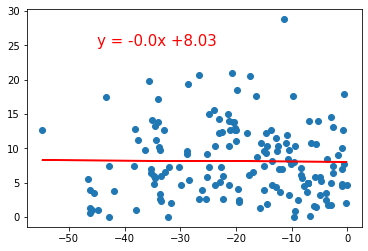

In [220]:
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel:('Latitude')
plt.ylabel:('Wind Speed')
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_lat_speed.png")
plt.show()